In [26]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
X_train = np.array([[ 1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.]])

In [2]:
print(X_train)

[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]


In [3]:
(X_train[:,0]-X_train[:,0].mean())/X_train[:,0].std()


array([ 0.        ,  1.22474487, -1.22474487])

In [4]:
(X_train[:,1]-X_train[:,1].mean())/X_train[:,1].std()

array([-1.22474487,  0.        ,  1.22474487])

In [5]:
(X_train[:,2]-X_train[:,2].mean())/X_train[:,2].std()

array([ 1.33630621, -0.26726124, -1.06904497])

In [6]:
(X_train-X_train.mean(axis=0))/X_train.std(axis=0)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [7]:
from sklearn import preprocessing

In [8]:
X_scale = preprocessing.scale(X_train)

In [9]:
print(X_scale)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


In [10]:
X_scale.mean(axis=0)

array([0., 0., 0.])

In [11]:
X_scale.std(axis=0)

array([1., 1., 1.])

In [12]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [13]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [15]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [16]:
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [17]:
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

In [18]:
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [20]:
import matplotlib.pyplot as plt

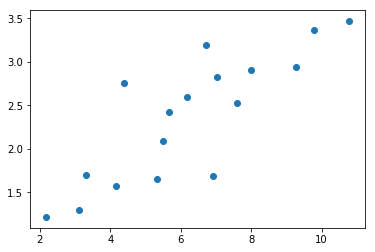

In [22]:
plt.scatter(x=X,y=Y)

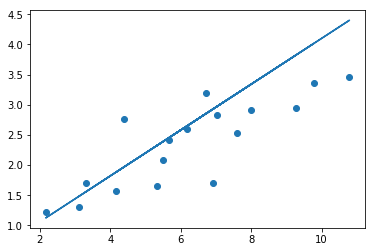

0.3340064573020295


In [24]:
M = sum(Y)/sum(X)
predicted_y_values = list(map(lambda x: M*x + 0.3, X))
plt.scatter(X, Y)
plt.plot(X, predicted_y_values)

error = sum([ (i-j)**2 for i, j in zip(Y, predicted_y_values) ]) / len(Y)

plt.show()
print(error)

[0.25163494 0.79880123]
 
0.2516 x + 0.7988
[ 2.167  3.1    3.3    4.168  4.4    5.313  5.5    5.654  6.182  6.71
  6.93   7.042  7.59   7.997  9.27   9.779 10.791]


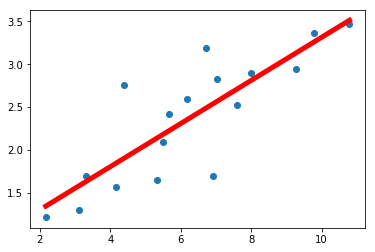

[[0.25163494]]
[0.79880123]


In [27]:
plt.scatter(X, Y)
print(np.polyfit(X, Y, 1))
print(np.poly1d(np.polyfit(X, Y, 1)))
print(np.unique(X))
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)), color='red', linewidth=5)
plt.show()

reg = LinearRegression().fit(X.reshape(-1, 1), Y.reshape(-1, 1))

print(reg.coef_)

print(reg.intercept_)

In [28]:
lr_reg = LinearRegression()

In [29]:
lr_reg.fit(X.reshape(-1,1),Y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
X.reshape(-1,1)

array([[ 3.3  ],
       [ 4.4  ],
       [ 5.5  ],
       [ 6.71 ],
       [ 6.93 ],
       [ 4.168],
       [ 9.779],
       [ 6.182],
       [ 7.59 ],
       [ 2.167],
       [ 7.042],
       [10.791],
       [ 5.313],
       [ 7.997],
       [ 5.654],
       [ 9.27 ],
       [ 3.1  ]])

In [31]:
print(lr_reg.coef_)

[[0.25163494]]


In [32]:
print(lr_reg.intercept_)

[0.79880123]


In [33]:
FILEPATH = "downloads/Advertising.csv"

df = pd.read_csv(FILEPATH)

In [34]:
df

Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
5             6    8.7   48.9       75.0    7.2
6             7   57.5   32.8       23.5   11.8
7             8  120.2   19.6       11.6   13.2
8             9    8.6    2.1        1.0    4.8
9            10  199.8    2.6       21.2   10.6
10           11   66.1    5.8       24.2    8.6
11           12  214.7   24.0        4.0   17.4
12           13   23.8   35.1       65.9    9.2
13           14   97.5    7.6        7.2    9.7
14           15  204.1   32.9       46.0   19.0
15           16  195.4   47.7       52.9   22.4
16           17   67.8   36.6      114.0   12.5
17           18  281.4   39.6       55.8   24.4
18           19   69.2   20.5       18.3   11.3
19           20  147.3   23.9       19.1   14.6
20           21  218.4   27.7       53.4   18.0
21           22  237.4    5.1       23.5   12.5
22           23   13.2   15.9       49.6    5.6
23           24  228.3   16.9       26.2   15.5
24           25   62.3   12.6       18.3    9.7
25           26  262.9    3.5       19.5   12.0
26           27  142.9   29.3       12.6   15.0
27           28  240.1   16.7       22.9   15.9
28           29  248.8   27.1       22.9   18.9
29           30   70.6   16.0       40.8   10.5
..          ...    ...    ...        ...    ...
170         171   50.0   11.6       18.4    8.4
171         172  164.5   20.9       47.4   14.5
172         173   19.6   20.1       17.0    7.6
173         174  168.4    7.1       12.8   11.7
174         175  222.4    3.4       13.1   11.5
175         176  276.9   48.9       41.8   27.0
176         177  248.4   30.2       20.3   20.2
177         178  170.2    7.8       35.2   11.7
178         179  276.7    2.3       23.7   11.8
179         180  165.6   10.0       17.6   12.6
180         181  156.6    2.6        8.3   10.5
181         182  218.5    5.4       27.4   12.2
182         183   56.2    5.7       29.7    8.7
183         184  287.6   43.0       71.8   26.2
184         185  253.8   21.3       30.0   17.6
185         186  205.0   45.1       19.6   22.6
186         187  139.5    2.1       26.6   10.3
187         188  191.1   28.7       18.2   17.3
188         189  286.0   13.9        3.7   15.9
189         190   18.7   12.1       23.4    6.7
190         191   39.5   41.1        5.8   10.8
191         192   75.5   10.8        6.0    9.9
192         193   17.2    4.1       31.6    5.9
193         194  166.8   42.0        3.6   19.6
194         195  149.7   35.6        6.0   17.3
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

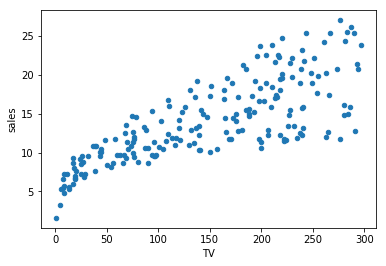

In [37]:
df.plot.scatter(x="TV",y="sales")

In [38]:
xx = df["TV"]

In [40]:
yy = df["sales"]

[0.04753664 7.03259355]
 
0.04754 x + 7.033
[  0.7   4.1   5.4   7.3   7.8   8.4   8.6   8.7  11.7  13.1  13.2  16.9
  17.2  17.9  18.7  18.8  19.4  19.6  23.8  25.   25.1  25.6  26.8  27.5
  28.6  31.5  36.9  38.   38.2  39.5  43.   43.1  44.5  44.7  48.3  50.
  53.5  56.2  57.5  59.6  62.3  66.1  66.9  67.8  68.4  69.   69.2  70.6
  73.4  74.7  75.1  75.3  75.5  76.3  76.4  78.2  80.2  85.7  87.2  88.3
  89.7  90.4  93.9  94.2  95.7  96.2  97.2  97.5 100.4 102.7 104.6 107.4
 109.8 110.7 112.9 116.  117.2 120.2 120.5 121.  123.1 125.7 129.4 131.1
 131.7 134.3 135.2 136.2 137.9 139.2 139.3 139.5 140.3 141.3 142.9 147.3
 149.7 149.8 151.5 156.6 163.3 163.5 164.5 165.6 166.8 168.4 170.2 171.3
 172.5 175.1 175.7 177.  180.8 182.6 184.9 187.8 187.9 188.4 191.1 193.2
 193.7 195.4 197.6 198.9 199.1 199.8 202.5 204.1 205.  206.8 206.9 209.6
 210.7 210.8 213.4 213.5 214.7 215.4 216.4 216.8 217.7 218.4 218.5 219.8
 220.3 220.5 222.4 224.  225.8 227.2 228.  228.3 229.5 230.1 232.1 234.5
 237.4 2

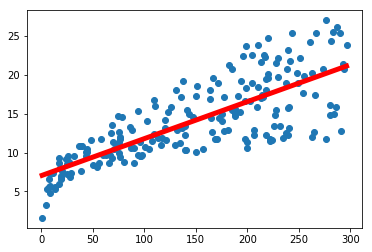

AttributeError: 'Series' object has no attribute 'reshape'

In [42]:
plt.scatter(xx,yy)
print(np.polyfit(xx, yy, 1))
print(np.poly1d(np.polyfit(xx, yy, 1)))
print(np.unique(xx))
plt.plot(np.unique(xx), np.poly1d(np.polyfit(xx, yy, 1))(np.unique(xx)), color='red', linewidth=5)
plt.show()

reg2 = LinearRegression().fit(xx.reshape(-1, 1), yy.reshape(-1, 1))
print(reg2.coef_)

print(reg2.intercept_)

In [46]:
from sklearn.model_selection import train_test_split
# import module to calculate model perfomance metrics
from sklearn import metrics

data_path = "downloads/Advertising.csv" # or load the dataset directly from the link
# # data_link = "http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv"

data = pd.read_csv(data_path, index_col=0)

# create a Python list of feature names
feature_names = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_names]

# sales
y = data.Sales

# Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Linear Regression Model
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

KeyError: "['Radio' 'Newspaper'] not in index"

In [47]:
print("Now in the sales section!")
print("Get CSV and create both the x and y columns")
dataframe = pd.read_csv("downloads/Advertising.csv")
feature_cols = ["TV", "radio", "newspaper"]
X = dataframe[feature_cols][:150]
Y = dataframe.sales[:150]

print("Generating a linear regression on the top 150 companies (first one)")
sales_regression = LinearRegression()
sales_regression.fit(X, Y)

print("Printing the coefficient and y intercept of our first 150 sales")
print(sales_regression.coef_)
print(sales_regression.intercept_)

print("Predicting the sales of the bottom 50 companies (last ones)")
print(sales_regression.predict(dataframe[feature_cols][:-50]))

Now in the sales section!
Get CSV and create both the x and y columns
Generating a linear regression on the top 150 companies (first one)
Printing the coefficient and y intercept of our first 150 sales
[ 0.04700012  0.17993257 -0.00140273]
3.029766796293684
Predicting the sales of the bottom 50 companies (last ones)
[20.54887629 12.12935888 11.99986446 17.49944016 13.3887405  12.13216558
 11.60109776 12.18958782  3.81042349 12.85847736  7.14613745 17.43346317
 10.37156277  8.96966628 18.477747   20.72216916 12.6419954  23.30265766
  9.94512274 14.22648061 18.20381911 15.07228699  6.44152069 16.76400286
  8.1993546  15.98850884 15.00043373 17.28724677 19.56744655  9.16966484
 21.82759541 11.4127615   7.82599525 19.11122907  7.76920358 17.41850177
 23.44813157 15.36523981  9.81043565 20.48436445 16.51546091 17.30425
 21.8106091  14.22849291  8.77299852 15.26378443  8.97693237 21.74634654
 16.48113213  8.22766528 12.92964702  9.47088161 20.64823258 19.84253292
 20.53645271 21.18259554  8.